## PROJECT : 2

## Fifa20

## PROJECT DETAILS:

* Task 1:-Prepare a complete data analysis report on the given data.

* Task 2:- Explore football skills and cluster football players based on their attributes.
* Task3:- Explore the data and attempt all the below asked questions in a
  step by step manner:
  
     ● Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?
     
     ● Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?
     
     ● Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 




## IMPORTING THE NECESSARY LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## LOAD THE DATA

In [4]:
data=pd.read_csv("C:\\Users\\user\\Downloads\\PRCP-1004-Fifa20 (1)\\Data\\players_20.csv")

 * GOAL OF THE PROJECT:
       
       1.Explore football skills and cluster football players based on their attributes. 
       2.FIFA 20 Football is arguably the most popular sport in the world and FIFA is the most popular football (soccer) simulation game by Electronic Arts (EA Sports).The dataset provided includes the players data for the Career Mode from FIFA 15 to FIFA 20 ("players_20.csv"). The data allows multiple comparisons of the same players across the last 6 versions of the videogame.


## BASIC CHECKS

In [5]:
# First 5 rows of a dataset
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [6]:
# last 5 rows of a dataset
data.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,...,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [10]:
# Shape of a dataset
data.shape

(18278, 104)

In [12]:
# Columns of dataset
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

## EXAMINE THE DATA

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


## STATISTICAL SUMMARY OF DATA

In [8]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


## EXPLORATORY DATA ANALYSIS (EDA)

## Historical comparision between Messi and Ronaldo

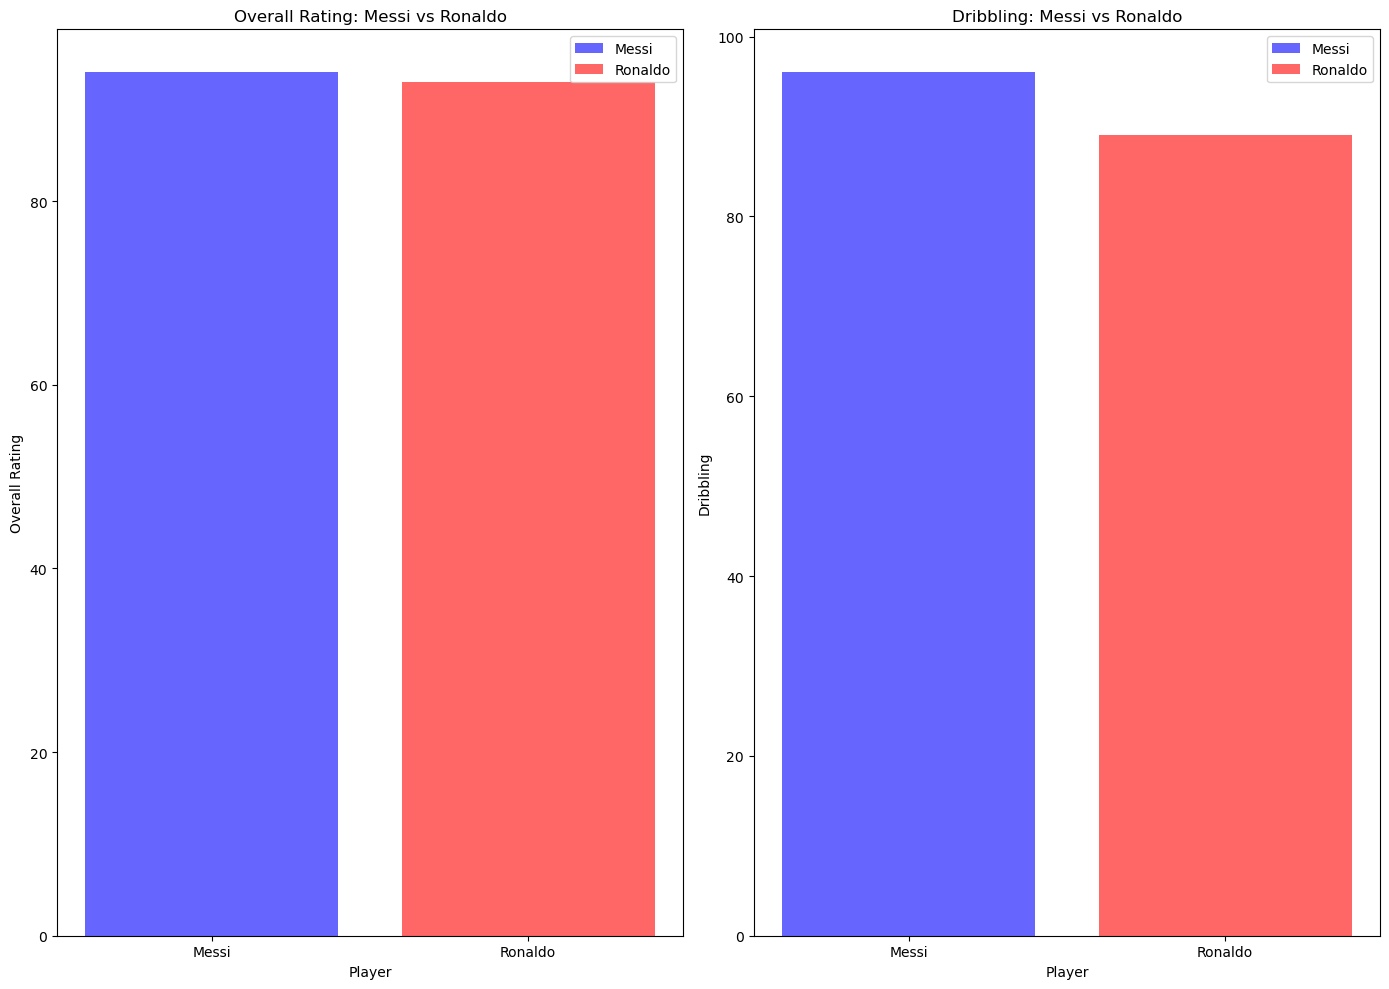

In [26]:
# Filter data for Messi and Ronaldo
messi_data = data[data['short_name'] == 'L. Messi']
ronaldo_data = data[data['short_name'] == 'Cristiano Ronaldo']



# Create subplots for comparing multiple attributes (e.g., Dribbling, Shooting, Pace, Overall)
fig, axes = plt.subplots(1, 2, figsize=(14, 10))

# Plot Overall Rating Comparison
axes[0].bar('Messi', messi_data['overall'], label='Messi', color='blue', alpha=0.6)
axes[0].bar('Ronaldo', ronaldo_data['overall'], label='Ronaldo', color='red', alpha=0.6)
axes[0].set_title('Overall Rating: Messi vs Ronaldo')
axes[0].set_xlabel('Player')
axes[0].set_ylabel('Overall Rating')
axes[0].legend()

# Plot Dribbling Comparison
axes[1].bar('Messi', messi_data['dribbling'], label='Messi', color='blue', alpha=0.6)
axes[1].bar('Ronaldo', ronaldo_data['dribbling'], label='Ronaldo', color='red', alpha=0.6)
axes[1].set_title('Dribbling: Messi vs Ronaldo')
axes[1].set_xlabel('Player')
axes[1].set_ylabel('Dribbling')
axes[1].legend()


# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()


* So we have Observed that Messi is often regarded as a more complete, technical player, excelling in dribbling, playmaking, and overall versatility. On the other hand, Ronaldo is a goal-scoring machine with a focus on physicality and athleticism, allowing him to thrive in more direct, attacking situations.


* This analysis highlights how both players dominate in different aspects of the game, contributing uniquely to their respective teams.

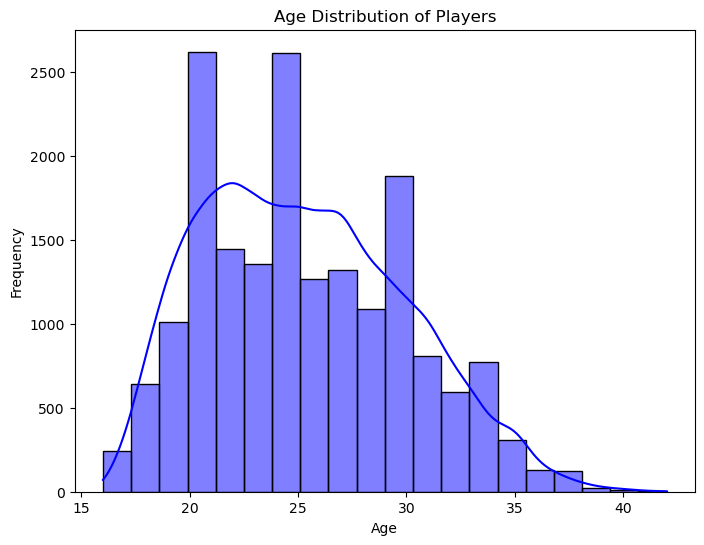

In [27]:
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## DATA PREPROCESSING

## 1. Handling missing values

In [174]:
data.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

* So we have missing values in some columns, filling with forward filling

In [30]:
data.fillna(method="ffill",inplace=True)

In [31]:
# CHECKING NULL VALUES ARE FILLED OR NOT
data.isnull().sum()

sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 104, dtype: int64

## DROP THE UNIQUE FEATURE

In [33]:
columns_to_drop = ['player_url', 'long_name', 'dob']
data_cleaned = data.drop(columns=columns_to_drop, axis=1)

In [34]:
data_cleaned['nationality'] = data_cleaned['nationality'].astype('category').cat.codes
data_cleaned['club'] = data_cleaned['club'].astype('category').cat.codes

## 1.Rank ordered list of Top 10 countries

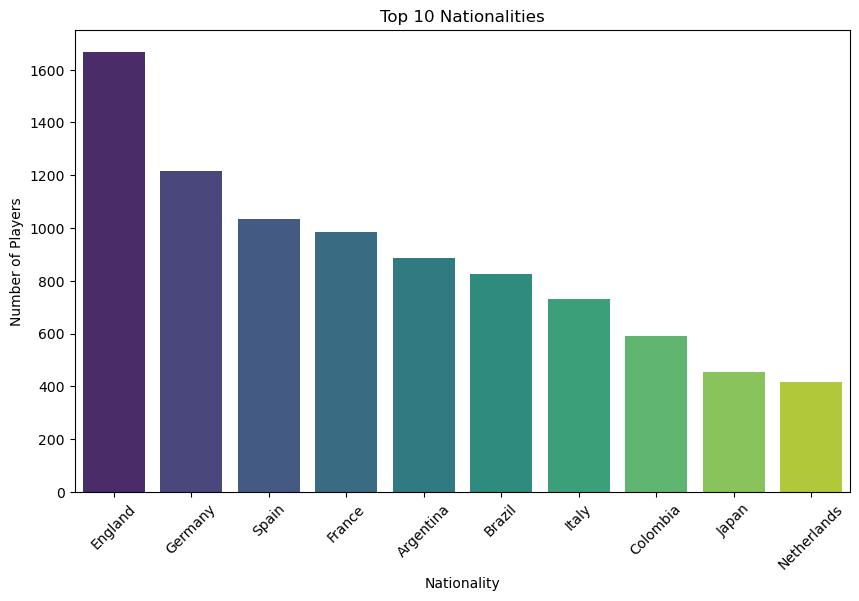

In [35]:
top_nations = data['nationality'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_nations.index, y=top_nations.values, palette='viridis')
plt.title('Top 10 Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

* Top Producers:
  
             Traditional football powerhouses like England, Spain, and Germany produce the most professional footballers.

## Feature Selection for Clustering

In [36]:
features = ['age', 'height_cm', 'weight_kg', 'overall', 'potential']
clustering_data = data[features]

In [37]:
clustering_data.fillna(method='ffill', inplace=True)

## Scaling the data 

In [40]:
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

## Model Building 

* KMEANS CLUSTERING

In [41]:
# Perform K-Means clustering
# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

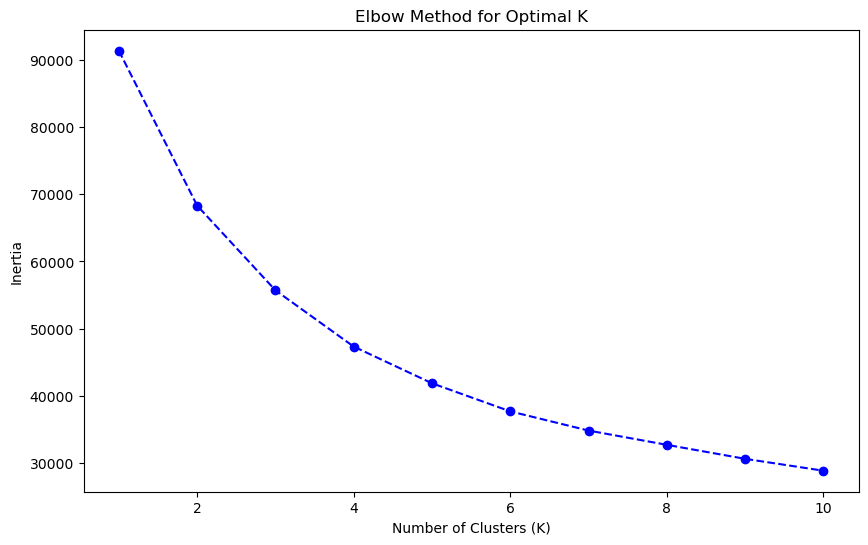

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

* Here we observed that optimal value for k is 2, so taking 2 clusters

In [43]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

In [44]:
# Creating new column for Clusters
data['Cluster'] = clusters

## Applying PCA to form clusters

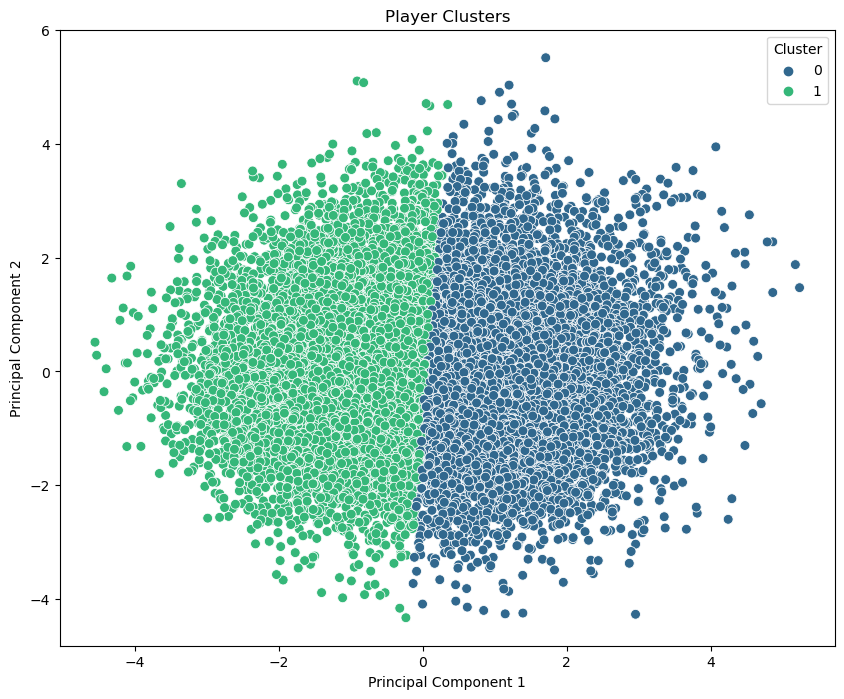

In [45]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(clustering_data_scaled)
data['PCA1'] = reduced_data[:, 0]
data['PCA2'] = reduced_data[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=data, s=50
)
plt.title('Player Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

## Count of each Cluster

In [206]:
print("Cluster Counts:")
print(data['Cluster'].value_counts())

Cluster Counts:
Cluster
1    9641
0    8637
Name: count, dtype: int64


## Each Cluster Data

In [46]:
for cluster in range(optimal_k):
    print(f"\nCluster {cluster} Sample Players:")
    print(data[data['Cluster'] == cluster][['short_name', 'age', 'overall', 'potential']].head())


Cluster 0 Sample Players:
          short_name  age  overall  potential
0           L. Messi   32       94         94
1  Cristiano Ronaldo   34       93         93
2          Neymar Jr   27       92         92
3           J. Oblak   26       91         93
4          E. Hazard   28       91         91

Cluster 1 Sample Players:
        short_name  age  overall  potential
26     R. Sterling   24       88         90
41  Bernardo Silva   24       87         90
48      D. Mertens   32       87         87
54      L. Insigne   28       87         87
58     M. Verratti   26       86         89


## Overall Cluster Interpretations

In [210]:
print("\nCluster Interpretations:")
for cluster in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster]
    avg_stats = cluster_data[['age', 'overall', 'potential', 'pace', 
                              'shooting', 'passing', 'dribbling', 'defending', 'physic']].mean()
    print(f"\nCluster {cluster}:")
    print(f"Number of Players: {len(cluster_data)}")
    print(f"Average Stats:\n{avg_stats}")


Cluster Interpretations:

Cluster 0:
Number of Players: 8637
Average Stats:
age          27.257034
overall      69.403381
potential    72.588051
pace         63.940182
shooting     53.456380
passing      58.215402
dribbling    61.834612
defending    57.122762
physic       71.393294
dtype: float64

Cluster 1:
Number of Players: 9641
Average Stats:
age          23.515092
overall      63.415517
potential    70.614148
pace         70.576597
shooting     51.412755
passing      56.483159
dribbling    63.064537
defending    47.294872
physic       59.893633
dtype: float64


## 2.To plot and analyze Overall rating Vs Age distributuion

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


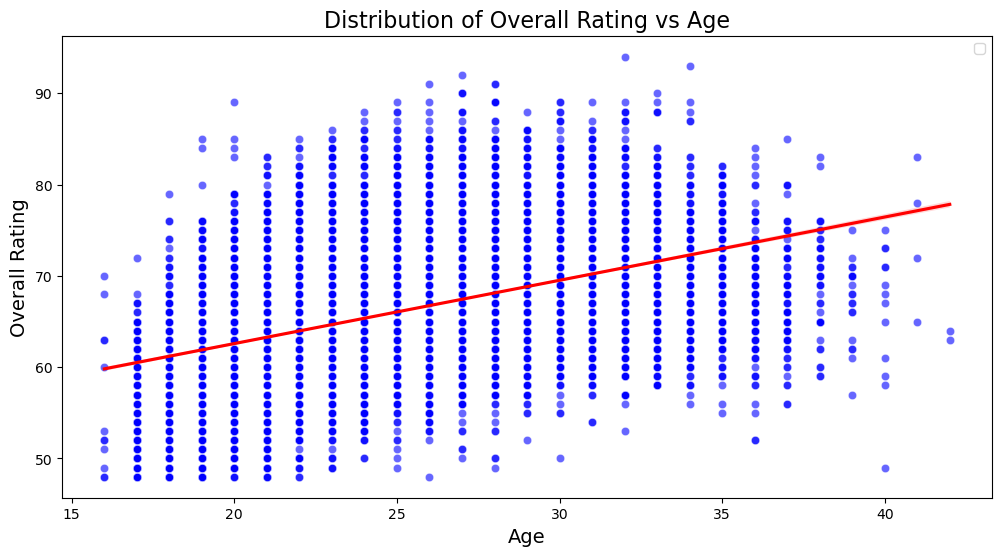

In [47]:
# Plot the distribution of Overall Rating vs Age
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='overall', data=data, alpha=0.6, color='blue')

# Add a trend line using linear regression
sns.regplot(x='age', y='overall', data=data, scatter=False, color='red', line_kws={"label":"Trend Line"})

# Add titles and labels
plt.title('Distribution of Overall Rating vs Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Overall Rating', fontsize=14)
plt.legend()
plt.show()





* Players improve significantly from their late teens to their mid-20s.
* Most players reach their peak between 26–29 years.
* After 30 years, overall ratings generally decline as physical attributes diminish, where the players stops improving.

## 3. The Offensive players who paid the most striker or left-winger or right-winger 

Average Salary by Offensive Position (Euros):
main_position
LW    13157.817109
RW    12758.799172
ST    10612.288786
Name: wage_eur, dtype: float64


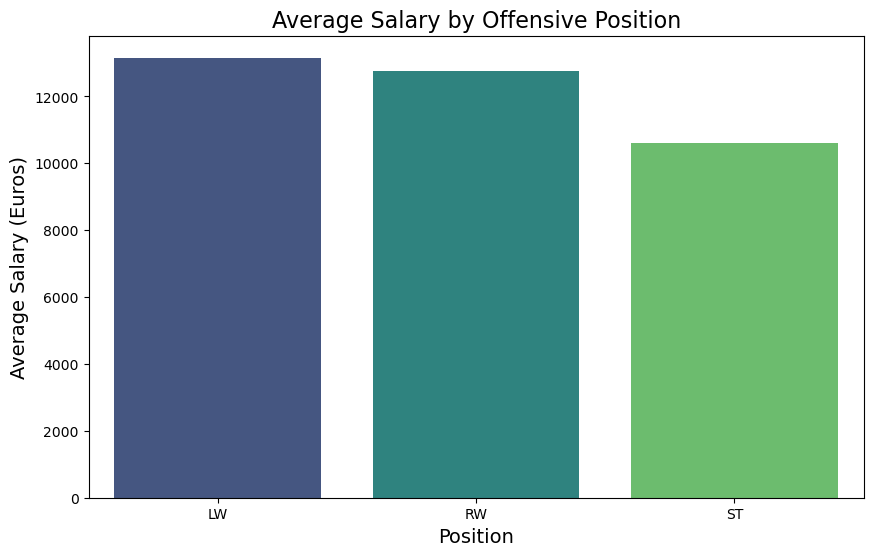

In [216]:
# Filter data for offensive positions
offensive_positions = ['ST', 'RW', 'LW']
offensive_players = data[data['player_positions'].apply(lambda x: any(pos in x for pos in offensive_positions))]

# Calculate average salary for each position
offensive_players['main_position'] = offensive_players['player_positions'].apply(
    lambda x: [pos for pos in offensive_positions if pos in x][0]
)
average_salary = offensive_players.groupby('main_position')['wage_eur'].mean().sort_values(ascending=False)

# Display results
print("Average Salary by Offensive Position (Euros):")
print(average_salary)

# Visualize the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=average_salary.index, y=average_salary.values, palette='viridis')
plt.title('Average Salary by Offensive Position', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Average Salary (Euros)', fontsize=14)
plt.show()


* Left-Wingers Command Higher Salaries:

Likely due to their creativity, versatility, and star power

Left-wingers are critical in breaking defensive setups and delivering high-impact performances.


High-paying clubs are often willing to invest in left-wingers who bring both on-field and commercial value.

## Top 10 earners of offensive players

In [221]:
# Top 10 Earners in Offensive Positions
top_earners = offensive_players[['short_name', 'main_position', 'wage_eur']].sort_values(by='wage_eur', ascending=False).head(10)
print("Top 10 Earners Among Offensive Players:")
print(top_earners)


Top 10 Earners Among Offensive Players:
            short_name main_position  wage_eur
0             L. Messi            ST    565000
4            E. Hazard            LW    470000
1    Cristiano Ronaldo            ST    405000
22        A. Griezmann            ST    370000
19           L. Suárez            ST    355000
17           S. Agüero            ST    300000
2            Neymar Jr            LW    290000
46          K. Benzema            ST    285000
26         R. Sterling            RW    255000
100            G. Bale            ST    250000


## CONCLUSION

* This project has successfully provided a snapshot into the performance and comparison of two of the greatest football players, showcasing how attributes influence team-building decisions and player evaluation in the context of modern football.